# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

#### Codice

Ho modificato il codice per inserire le modifiche richieste; le modifiche che ho apportato sono commentate nel codice, e sono:

1. Nel main, ho inserito una chiamata ad una funzione ConfOld(), che salva la configurazione old (penultima configurazione della simulazione).

2. funzione ConfOld(): salva in un file old.final le coordinate xold, yold, zold di tutte le particelle; chiamata al termine dell'algoritmo di Verlet, salva la penultima configurazione, che servirà per il restart della simulazione.

3. nella funzione Input: se esiste un file old.0 (da copiare da old.final), legge da questo file la configurazione old, insieme alla configurazione iniziale, quindi invece di creare un set di velocità in modo randomico, calcola $$ v(t + \frac{dt}{2}) \sim \frac{r(t+dt) - r(t)}{dt}$$ con la quale calcola il fattore di scala e le "nuove" coordinate old; se il file old.0 non esiste, la simulazione si avvia secondo il codice originale.

4. Nell'header file ho inserito come variabili una serie di vettori utili per il data blocking ed il numero di blocchi, che ho fissato a 1000; in questo modo, poichè il codice esegue una misura delle variabili ogni 10 step, le simulazioni brevi, per portare il sistema all'equilibrio, eseguono il data-blocking su una sola misura per blocco, riducendo al minimo il costo computazionale dell'operazione, che non è di interesse mentre si porta il sistema all'equilibrio; una volta portato il sistema all'equilibrio, lancio simulazioni da 1000000 di step, in modo da avere 100000 misure delle variabili e quindi 100 misure in ogni blocco (l'operazione dura poco più di un'ora).

5. Nel main, ho inserito in calcolo di data blocking, accumulando all'interno del ciclo di misure le medie su ogni blocco in appositi vettori dichiarati nell'header file. Una volta ottenute le medie delle misure in ogni blocco, le medie sui blocchi ed il calcolo delle deviazioni standard associata sono effettuati al termine del ciclo di simulazione.

6. Nella funzione Measure: ho inserito il calcolo della pressione in unità ridotte di Lennard Jones $$ P = \rho \cdot T + \frac{1}{3V}\sum_{j=1}^{n}\sum_{i<j} 48 \cdot \Big( \big(\frac{1}{r_{ij}} \big)^{12} - \frac{1}{2} \cdot \big( \frac{1}{r_{ij}} \big)^{6} \Big) $$

#### Equilibrazione

Riporto qui i grafici delle grandezze termodinamiche delle 4 simulazioni da 10000 step che ho eseguito per verificare che la lettura della configurazione old porta il sistema all'equilibrio. Per verificare ciò ho inizializzato la prima simulazione partendo da una configurazione fcc perfetta, utilizzando però una temperatura iniziale non dello stato solido, cioè 1,4. dopo 4 restart della simulazione la temperatura non ha più un brusco calo iniziale verso valori tipici dello stato solido ma rimane oscillante attorno al valore iniziale.

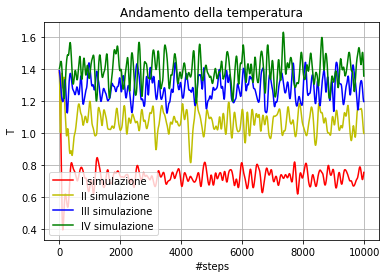

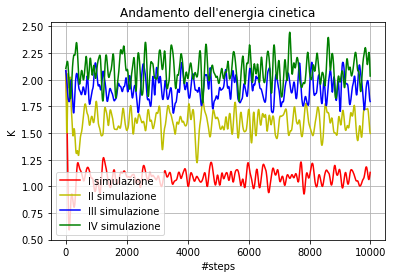

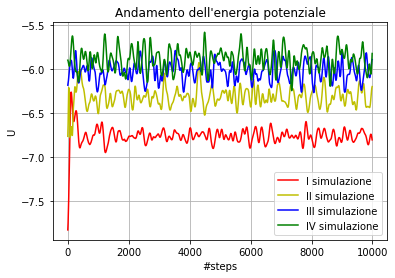

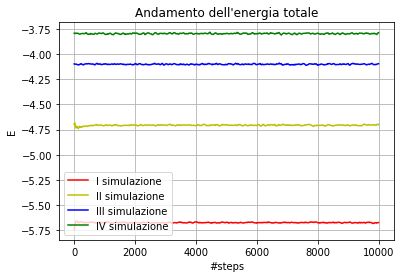

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 1000       #numero di misure
T1 = np.loadtxt("equilibrazione/output_temp1.dat")
T2 = np.loadtxt("equilibrazione/output_temp2.dat")
T3 = np.loadtxt("equilibrazione/output_temp3.dat")
T4 = np.loadtxt("equilibrazione/output_temp4.dat")
K1 = np.loadtxt("equilibrazione/output_ekin1.dat")
K2 = np.loadtxt("equilibrazione/output_ekin2.dat")
K3 = np.loadtxt("equilibrazione/output_ekin3.dat")
K4 = np.loadtxt("equilibrazione/output_ekin4.dat")
U1 = np.loadtxt("equilibrazione/output_epot1.dat")
U2 = np.loadtxt("equilibrazione/output_epot2.dat")
U3 = np.loadtxt("equilibrazione/output_epot3.dat")
U4 = np.loadtxt("equilibrazione/output_epot4.dat")
E1 = np.loadtxt("equilibrazione/output_etot1.dat")
E2 = np.loadtxt("equilibrazione/output_etot2.dat")
E3 = np.loadtxt("equilibrazione/output_etot3.dat")
E4 = np.loadtxt("equilibrazione/output_etot4.dat")

y = np.arange(M)
y*=10


plt.plot(y,T1, 'r', label="I simulazione")
plt.plot(y,T2, 'y', label="II simulazione")
plt.plot(y,T3, 'b', label="III simulazione")
plt.plot(y,T4, 'g', label="IV simulazione")
plt.title("Andamento della temperatura")
plt.xlabel('#steps')
plt.ylabel('T')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(y,K1, 'r', label="I simulazione")
plt.plot(y,K2, 'y', label="II simulazione")
plt.plot(y,K3, 'b', label="III simulazione")
plt.plot(y,K4, 'g', label="IV simulazione")
plt.title("Andamento dell'energia cinetica")
plt.xlabel('#steps')
plt.ylabel('K')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(y,U1, 'r', label="I simulazione")
plt.plot(y,U2, 'y', label="II simulazione")
plt.plot(y,U3, 'b', label="III simulazione")
plt.plot(y,U4, 'g', label="IV simulazione")
plt.title("Andamento dell'energia potenziale")
plt.xlabel('#steps')
plt.ylabel('U')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(y,E1, 'r', label="I simulazione")
plt.plot(y,E2, 'y', label="II simulazione")
plt.plot(y,E3, 'b', label="III simulazione")
plt.plot(y,E4, 'g', label="IV simulazione")
plt.title("Andamento dell'energia totale")
plt.xlabel('#steps')
plt.ylabel('E')
plt.grid(True)
plt.legend()
plt.show()


### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

#### Esercizio

Per verificare il metodo inserito l'ho testato su una simulazione di fase solida in questo modo:

- ho inizializzato la simulazione con parametri tipici dello stato solido (T=0.8 , $\rho$=1.1 , $r_{c}$=2.2) da una configurazione iniziale fcc;
- ho lanciato 5 simulazioni da 10000 step, in modo da portare il sistema all'equilibrio, ripartendo con le config. final e old;
- ho lanciato la simulazione vera, ripartendo dalle ultime configurazioni col sistema all'equilibrio, effettuando un milione di step (in questo modo ho 100 misure delle variabili in ognuno dei 1000 blocchi).

Riporto di seguito in grafici le stime a blocchi, con l'incertezza associata, delle variabili in esame.

C:\Users\Alessandro\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


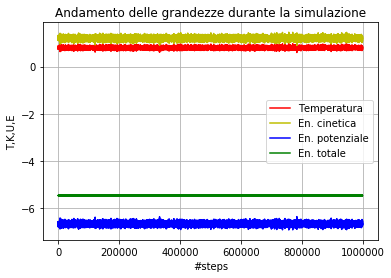

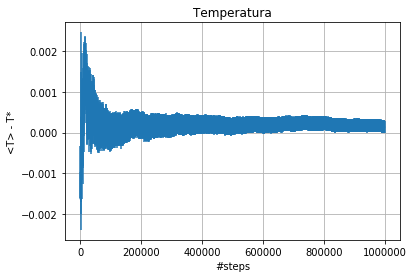

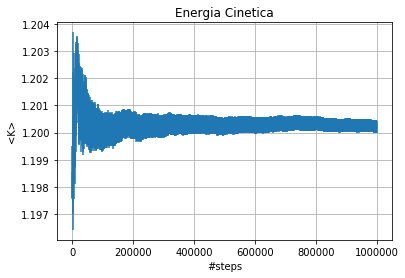

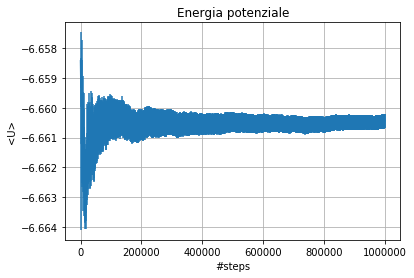

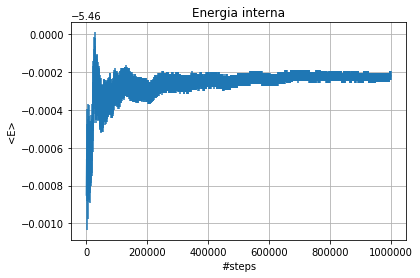

In [2]:
x=np.arange(1000)
x*=1000
z=np.arange(100000)
z*=10

T = np.loadtxt("test_data_blocking/ave_temp.dat")
sT = np.loadtxt("test_data_blocking/err_temp.dat")
oT = np.loadtxt("test_data_blocking/output_temp.dat")
K = np.loadtxt("test_data_blocking/ave_ekin.dat")
sK = np.loadtxt("test_data_blocking/err_ekin.dat")
oK = np.loadtxt("test_data_blocking/output_ekin.dat")
U = np.loadtxt("test_data_blocking/ave_epot.dat")
sU = np.loadtxt("test_data_blocking/err_epot.dat")
oU = np.loadtxt("test_data_blocking/output_epot.dat")
E = np.loadtxt("test_data_blocking/ave_etot.dat")
sE = np.loadtxt("test_data_blocking/err_etot.dat")
oE = np.loadtxt("test_data_blocking/output_etot.dat")

plt.plot(z,oT, 'r', label="Temperatura")
plt.plot(z,oK, 'y', label="En. cinetica")
plt.plot(z,oU, 'b', label="En. potenziale")
plt.plot(z,oE, 'g', label="En. totale")
plt.title("Andamento delle grandezze durante la simulazione")
plt.xlabel('#steps')
plt.ylabel('T,K,U,E')
plt.grid(True)
plt.legend()
plt.show()

plt.errorbar(x,T - 0.8, yerr=sT)
plt.title("Temperatura")
plt.xlabel('#steps')
plt.ylabel('<T> - T*')
plt.grid(True)
plt.show()

plt.errorbar(x,K, yerr=sK)
plt.title("Energia Cinetica")
plt.xlabel('#steps')
plt.ylabel('<K>')
plt.grid(True)
plt.show()

plt.errorbar(x,U, yerr=sU)
plt.title("Energia potenziale")
plt.xlabel('#steps')
plt.ylabel('<U>')
plt.grid(True)
plt.show()

plt.errorbar(x,E, yerr=sE)
plt.title("Energia interna")
plt.xlabel('#steps')
plt.ylabel('<E>')
plt.grid(True)
plt.show()

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

#### Esercizio

Ho eseguito le simulazioni in questo modo:

- partendo da una configurazione fcc, ho eseguito 5 run brevi (da 10000 step) con input di stato solido, per equilibrare il sistema;
- ho lanciato la simulazione dello stato solido con un milione di step;
- partendo dall'ultima configurazione di stato solido, ho lanciato 5 run brevi con input di stato liquido per equilibrare il sistema al nuovo stato termodinamico;
- ho lanciato la simulazione di stato liquido con un milione di step;
- nuovamente, partendo dall'ultima configurazione di stato liquido, ho lanciato 5 run brevi con input di stato gassoso per equilibrare il sistema.
- ho lanciato la simulazione di stato gassoso da un milione di step.

la simulazione utilizza le unità ridotte di Lennard-Jones; poichè queste unità vengono utilizzate in simulazione per poter rappresentare le proprietà termodinamiche del sistema indipendentemente dal tipo di atomi presi in esame, converto le unità ridotte in valori del SI prima del plot, nel codice di seguito, utilizzando i valori di conversione per L'argon, in questo modo:

$$ T = \frac{\epsilon}{k_b} \cdot T^{*}$$
$$ U = \epsilon \cdot U^{*}$$
$$ K = \epsilon \cdot k^{*}$$
$$ E = \epsilon \cdot E^{*}$$
$$ P = \frac{\epsilon}{\sigma^3} \cdot P^{*}$$

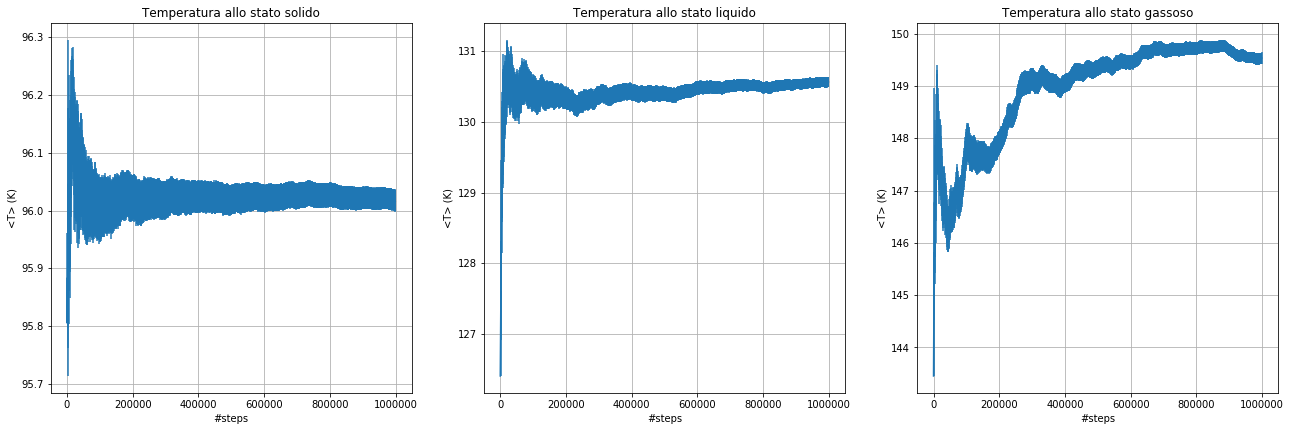

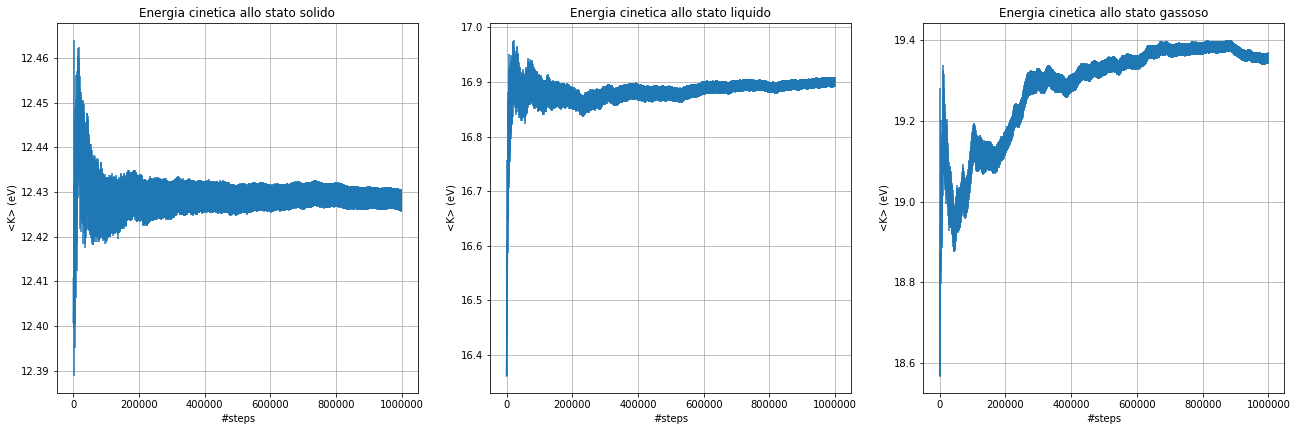

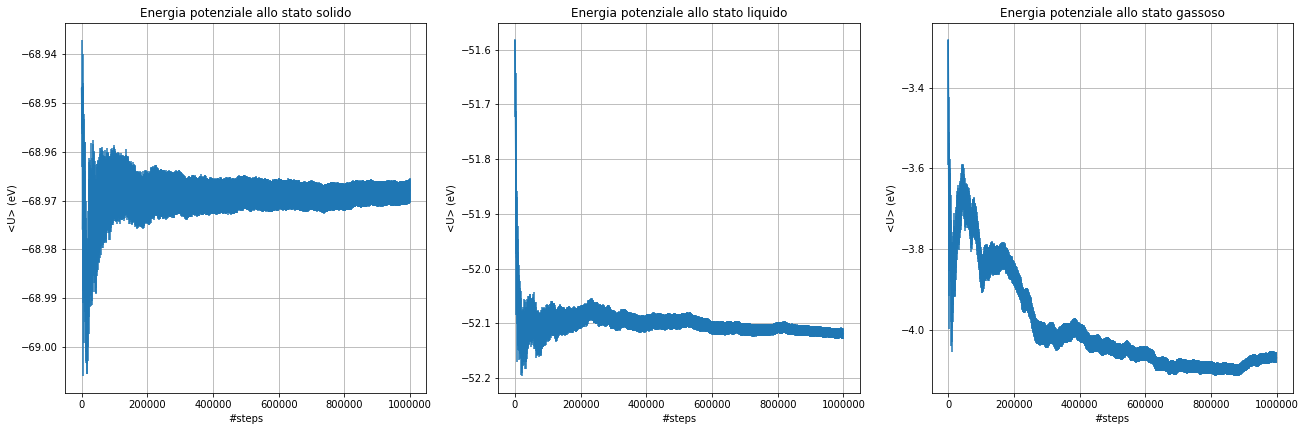

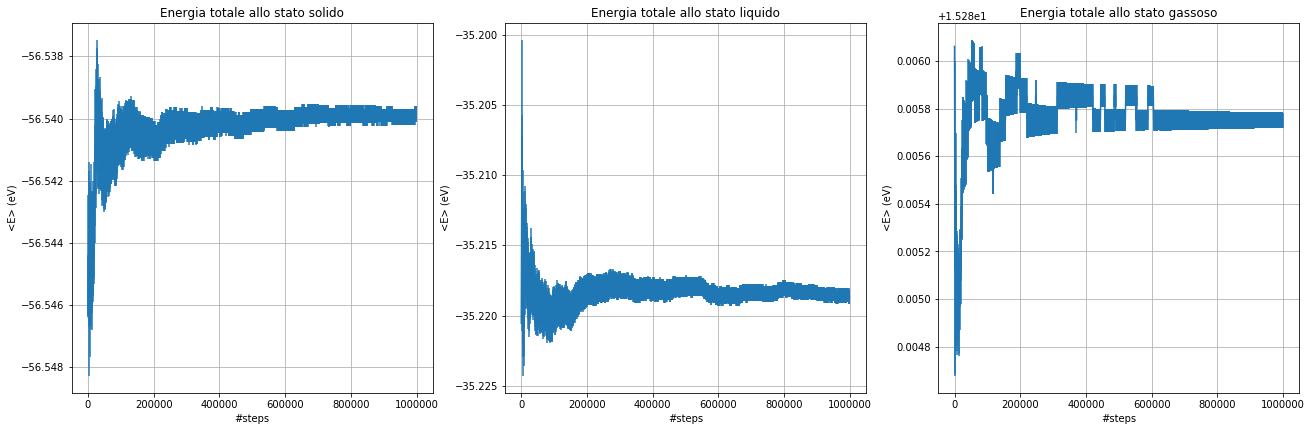

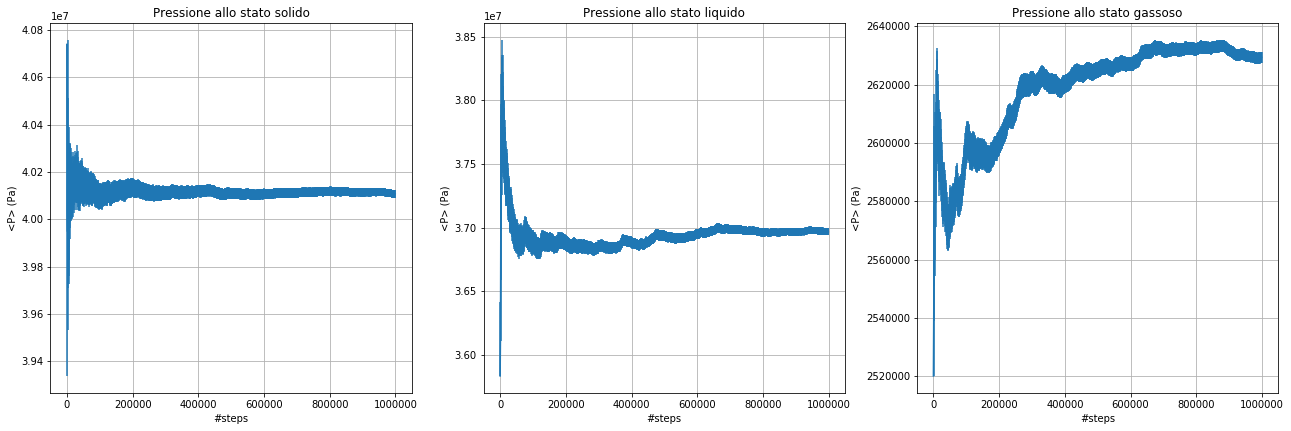

In [15]:
epsk = 120                            #in Kelvin
sigma = 3.4 * (1/(10**(10)))          #in metri
Boltz = 1.380649 * (1/(10**(23)))     #in Joule/Kelvin
eps = epsk*Boltz*((10**(22))/(1.6))   #in meV
eps2 = epsk*Boltz                     #in Joule
f = eps2/(sigma**3)                    #in Pascal

Tsol = np.loadtxt("solido/ave_temp.dat")
Tliq = np.loadtxt("liquido/ave_temp.dat")
Tgas = np.loadtxt("gassoso/ave_temp.dat")
sTsol = np.loadtxt("solido/err_temp.dat")
sTliq = np.loadtxt("liquido/err_temp.dat")
sTgas = np.loadtxt("gassoso/err_temp.dat")
Ksol = np.loadtxt("solido/ave_ekin.dat")
Kliq = np.loadtxt("liquido/ave_ekin.dat")
Kgas = np.loadtxt("gassoso/ave_ekin.dat")
sKsol = np.loadtxt("solido/err_ekin.dat")
sKliq = np.loadtxt("liquido/err_ekin.dat")
sKgas = np.loadtxt("gassoso/err_ekin.dat")
Usol = np.loadtxt("solido/ave_epot.dat")
Uliq = np.loadtxt("liquido/ave_epot.dat")
Ugas = np.loadtxt("gassoso/ave_epot.dat")
sUsol = np.loadtxt("solido/err_epot.dat")
sUliq = np.loadtxt("liquido/err_epot.dat")
sUgas = np.loadtxt("gassoso/err_epot.dat")
Esol = np.loadtxt("solido/ave_etot.dat")
Eliq = np.loadtxt("liquido/ave_etot.dat")
Egas = np.loadtxt("gassoso/ave_etot.dat")
sEsol = np.loadtxt("solido/err_etot.dat")
sEliq = np.loadtxt("liquido/err_etot.dat")
sEgas = np.loadtxt("gassoso/err_etot.dat")
Psol = np.loadtxt("solido/ave_pres.dat")
Pliq = np.loadtxt("liquido/ave_pres.dat")
Pgas = np.loadtxt("gassoso/ave_pres.dat")
sPsol = np.loadtxt("solido/err_pres.dat")
sPliq = np.loadtxt("liquido/err_pres.dat")
sPgas = np.loadtxt("gassoso/err_pres.dat")

Tsol *= epsk
Tliq *= epsk
Tgas *= epsk
sTsol *= epsk
sTliq *= epsk
sTgas *= epsk
Ksol *= eps
Kliq *= eps
Kgas *= eps
sKsol *= eps
sKliq *= eps
sKgas *= eps
Usol *= eps
Uliq *= eps
Ugas *= eps
sUsol *= eps
sUliq *= eps
sUgas *= eps
Esol *= eps
Eliq *= eps
Egas *= eps
sEsol *= eps
sEliq *= eps
sEgas *= eps
Psol *= f
Pliq *= f
Pgas *= f
sPsol *= f
sPliq *= f
sPgas *= f

plt.figure(figsize=[22,6.8])
plt.subplot(1,3,1)
plt.errorbar(x,Tsol,yerr=sTsol, label="solido")
plt.title("Temperatura allo stato solido")
plt.xlabel('#steps')
plt.ylabel('<T> (K)')
plt.grid(True)
plt.subplot(1,3,2)
plt.errorbar(x,Tliq,yerr=sTliq, label="liquido")
plt.title("Temperatura allo stato liquido")
plt.xlabel('#steps')
plt.ylabel('<T> (K)')
plt.grid(True)
plt.subplot(1,3,3)
plt.errorbar(x,Tgas,yerr=sTgas, label="gassoso")
plt.title("Temperatura allo stato gassoso")
plt.xlabel('#steps')
plt.ylabel('<T> (K)')
plt.grid(True)
plt.show()

plt.figure(figsize=[22,6.8])
plt.subplot(1,3,1)
plt.errorbar(x,Ksol,yerr=sKsol, label="solido")
plt.title("Energia cinetica allo stato solido")
plt.xlabel('#steps')
plt.ylabel('<K> (eV)')
plt.grid(True)
plt.subplot(1,3,2)
plt.errorbar(x,Kliq,yerr=sKliq, label="liquido")
plt.title("Energia cinetica allo stato liquido")
plt.xlabel('#steps')
plt.ylabel('<K> (eV)')
plt.grid(True)
plt.subplot(1,3,3)
plt.errorbar(x,Kgas,yerr=sKgas, label="gassoso")
plt.title("Energia cinetica allo stato gassoso")
plt.xlabel('#steps')
plt.ylabel('<K> (eV)')
plt.grid(True)
plt.show()

plt.figure(figsize=[22,6.8])
plt.subplot(1,3,1)
plt.errorbar(x,Usol,yerr=sUsol, label="solido")
plt.title("Energia potenziale allo stato solido")
plt.xlabel('#steps')
plt.ylabel('<U> (eV)')
plt.grid(True)
plt.subplot(1,3,2)
plt.errorbar(x,Uliq,yerr=sUliq, label="liquido")
plt.title("Energia potenziale allo stato liquido")
plt.xlabel('#steps')
plt.ylabel('<U> (eV)')
plt.grid(True)
plt.subplot(1,3,3)
plt.errorbar(x,Ugas,yerr=sUgas, label="gassoso")
plt.title("Energia potenziale allo stato gassoso")
plt.xlabel('#steps')
plt.ylabel('<U> (eV)')
plt.grid(True)
plt.show()

plt.figure(figsize=[22,6.8])
plt.subplot(1,3,1)
plt.errorbar(x,Esol,yerr=sEsol, label="solido")
plt.title("Energia totale allo stato solido")
plt.xlabel('#steps')
plt.ylabel('<E> (eV)')
plt.grid(True)
plt.subplot(1,3,2)
plt.errorbar(x,Eliq,yerr=sEliq, label="liquido")
plt.title("Energia totale allo stato liquido")
plt.xlabel('#steps')
plt.ylabel('<E> (eV)')
plt.grid(True)
plt.subplot(1,3,3)
plt.errorbar(x,Egas,yerr=sEgas, label="gassoso")
plt.title("Energia totale allo stato gassoso")
plt.xlabel('#steps')
plt.ylabel('<E> (eV)')
plt.grid(True)
plt.show()

plt.figure(figsize=[22,6.8])
plt.subplot(1,3,1)
plt.errorbar(x,Psol,yerr=sPsol, label="solido")
plt.title("Pressione allo stato solido")
plt.xlabel('#steps')
plt.ylabel('<P> (Pa)')
plt.grid(True)
plt.subplot(1,3,2)
plt.errorbar(x,Pliq,yerr=sPliq, label="liquido")
plt.title("Pressione allo stato liquido")
plt.xlabel('#steps')
plt.ylabel('<P> (Pa)')
plt.grid(True)
plt.subplot(1,3,3)
plt.errorbar(x,Pgas,yerr=sPgas, label="gassoso")
plt.title("Pressione allo stato gassoso")
plt.xlabel('#steps')
plt.ylabel('<P> (Pa)')
plt.grid(True)
plt.show()
